In [1]:
import csv
import os
from collections import Counter

import pandas as pd

In [2]:
ann_dir = "../data/train"

In [3]:
data = []
for ann_fname in os.listdir(ann_dir):
    if not ann_fname.endswith(".ann"):
        continue
    ann_path = os.path.join(ann_dir, ann_fname)
    with open(ann_path) as f:
        reader = csv.reader(f, delimiter="\t")
        rows = [row for row in reader]
        new_rows = [(row[1].split(" ")[0], row[2]) for row in rows]
        data.extend(new_rows)

In [4]:
df = pd.DataFrame(data, columns=["type_", "name"])
df.head()

,type_,name
0,Disease,1型糖尿病
1,Disease,1型糖尿病
2,Disease,2型糖尿病
3,Disease,2型糖尿病
4,Disease,2型糖尿病


In [5]:
wordcount = {}
for k, gp in df.groupby("type_"):
    wordcount[k] = gp['name'].value_counts()


In [6]:
wordcount.keys()

dict_keys(['Amount', 'Anatomy', 'Disease', 'Drug', 'Duration', 'Frequency', 'Level', 'Method', 'Operation', 'Reason', 'SideEff', 'Symptom', 'Test', 'Test_Value', 'Treatment'])

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸

In [8]:
wc= WordCloud(
        background_color="white",
        max_words=400,
        min_font_size=10,
        max_font_size=100,
        height=400,
        width=600,
        font_path="font/STSONG.TTF", #使用字体
    )

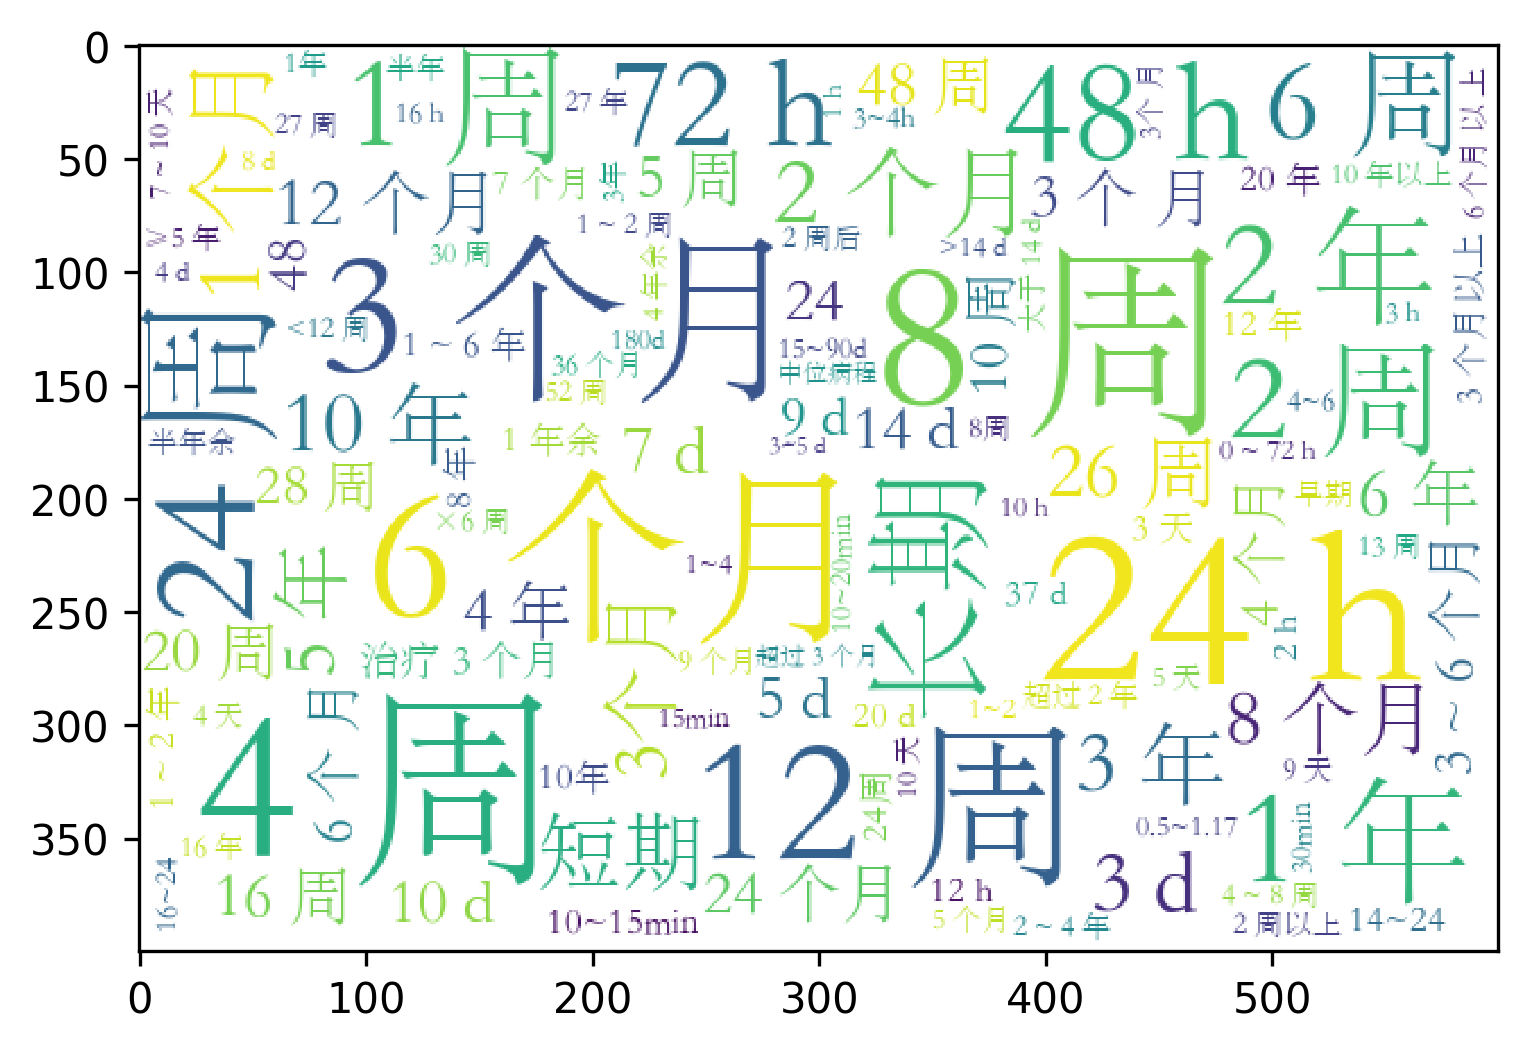

In [12]:
wd = wordcount['Duration'].to_dict()
wc.generate_from_frequencies(frequencies=wd)
plt.imshow(wc)